# Capstone 2 - Lending Club Loan Defaults Prediction¶

# Modeling


Modeling is the fifth step in the Data Science Method.  The following will be performed in this step:

1. Fit Models with Training Data Set
2. Review Model Outcomes — Iterate over additional models as needed.
3. Identify the Final Model

In [1]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings # For handling error messages.
#warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
# Read data output created in the EDA step
df = pd.read_csv("../EDA/data/Cap2_step3_output.csv", dtype={'verification_status_joint':object,'hardship_type':object, 'hardship_reason':object, 'hardship_status':object, 'hardship_loan_status':object, 'settlement_status':object}, index_col="Unnamed: 0")
df.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,initial_list_status,application_type,verification_status_joint,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_loan_status,debt_settlement_flag,settlement_status
0,2500,13.56,55000.0,18.24,0.0,1.0,0.0,45.0,1.0,4341,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
1,30000,18.94,90000.0,26.52,0.0,0.0,71.0,75.0,1.0,12315,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
2,5000,17.97,59280.0,10.51,0.0,0.0,0.0,0.0,0.0,4599,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
3,4000,18.94,92000.0,16.74,0.0,0.0,0.0,0.0,0.0,5468,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
4,30000,16.14,57250.0,26.35,0.0,0.0,0.0,0.0,0.0,829,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN


In [3]:
df.shape

(2150627, 87)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150627 entries, 0 to 2260667
Data columns (total 87 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   loan_amnt                                   int64  
 1   int_rate                                    float64
 2   annual_inc                                  float64
 3   dti                                         float64
 4   delinq_2yrs                                 float64
 5   inq_last_6mths                              float64
 6   mths_since_last_delinq                      float64
 7   mths_since_last_record                      float64
 8   pub_rec                                     float64
 9   revol_bal                                   int64  
 10  revol_util                                  float64
 11  out_prncp                                   float64
 12  total_pymnt                                 float64
 13  total_rec_int              

In [5]:
df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_dpd,orig_projected_additional_accrued_interest,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,...,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06,2.150627e+06
mean,1.455534e+04,1.315755e+01,6.911525e+04,1.910219e+01,3.019622e-01,5.717709e-01,1.680994e+01,1.166151e+01,1.972904e-01,1.522785e+04,...,3.856550e-03,6.066408e-01,1.407915e-02,7.129102e-01,6.392043e-02,1.664888e+00,8.860760e-01,7.394659e+01,7.149019e-01,1.966361e-01
std,8.859252e+03,4.824323e+00,3.159676e+04,1.439575e+01,8.613410e-01,8.803719e-01,2.308542e+01,2.867152e+01,5.606472e-01,1.705110e+04,...,9.259225e-02,5.605731e+00,2.050347e-01,1.360392e+01,1.144538e+00,3.550980e+01,1.851189e+01,7.449337e+02,5.868766e+00,1.883835e+00
min,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.670000e+00,4.500000e+04,1.219000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.810000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+04,1.269000e+01,6.400000e+04,1.815000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.096600e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,8.800000e+04,2.476000e+01,0.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,1.927500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.635000e+05,9.990000e+02,5.800000e+01,3.300000e+01,2.260000e+02,1.290000e+02,8.600000e+01,9.597540e+05,...,2.300000e+01,1.850000e+02,3.000000e+00,9.439400e+02,3.700000e+01,2.680890e+03,1.407860e+03,3.360100e+04,5.213500e+02,1.810000e+02


In [6]:
df['zip_code'].value_counts()

112xx    22865
945xx    21787
750xx    21749
606xx    20025
300xx    19156
         ...  
515xx        1
399xx        1
892xx        1
516xx        1
682xx        1
Name: zip_code, Length: 955, dtype: int64

## 'loan_status' is the response variable.
## Plan to predict fully paid and charged off status
## Features of interest are: 
'tot_cur_bal', 'annual_inc_joint', 'annual_inc', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens', '
## Features to not consider are
'title','zip_code','addr_state','recoveries', 'debt_settlement_flag', 'settlement_amount', ' settlement_percentage', 'settlement_term', 'settlement_status'



In [7]:
df_sel = df.drop(['total_pymnt','acc_now_delinq', 'delinq_amnt', 'tot_coll_amt', 'title', 'zip_code', 'addr_state', 'recoveries', 'debt_settlement_flag', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'settlement_status'], axis=1)

''' 
# Check these values in df_sel

loan_amnt                                   
annual_inc   
revol_bal  
tot_cur_bal
total_bal_il
max_bal_bc                                  
avg_cur_bal  
tax_liens      
total_bal_ex_mort   
total_bc_limit    
total_il_high_credit_limit     
revol_bal_joint        
hardship_amount      
hardship_last_payment_amount                        
'''

In [8]:
df_sel['loan_amnt'].value_counts()

10000    183149
20000    123816
12000    118794
15000    118790
5000      83452
          ...  
725           1
550           1
950           1
850           1
750           1
Name: loan_amnt, Length: 1571, dtype: int64

In [9]:
df_sel['annual_inc'].value_counts()

60000.0     87189
50000.0     76355
65000.0     64903
70000.0     62078
80000.0     59833
            ...  
44271.0         1
44269.0         1
94657.0         1
94659.0         1
131070.0        1
Name: annual_inc, Length: 83915, dtype: int64

In [10]:
df_sel['revol_bal'].value_counts()

0         11980
8           209
2           163
10          159
5235        158
          ...  
94025         1
96074         1
85837         1
110417        1
109518        1
Name: revol_bal, Length: 88143, dtype: int64

In [11]:
df_sel['tot_cur_bal'].value_counts()

0.0         69031
14186.0        41
20275.0        39
22831.0        38
23442.0        38
            ...  
309690.0        1
309689.0        1
309686.0        1
509276.0        1
381300.0        1
Name: tot_cur_bal, Length: 447363, dtype: int64

In [12]:
df_sel['total_bal_il'].value_counts()

0.0         986116
10000.0         98
15000.0         90
5000.0          83
5500.0          76
             ...  
339145.0         1
339113.0         1
339092.0         1
339074.0         1
84262.0          1
Name: total_bal_il, Length: 152044, dtype: int64

In [13]:
df_sel['max_bal_bc'].value_counts()

0.0         866592
8.0            544
3000.0         522
2000.0         495
4000.0         437
             ...  
27465.0          1
27460.0          1
27456.0          1
27453.0          1
131035.0         1
Name: max_bal_bc, Length: 30086, dtype: int64

In [14]:
df_sel['avg_cur_bal'].value_counts()

0.0         69048
2277.0        269
2442.0        267
2148.0        265
2025.0        265
            ...  
72094.0         1
72092.0         1
72087.0         1
72086.0         1
131042.0        1
Name: avg_cur_bal, Length: 80280, dtype: int64

In [15]:
df_sel['tax_liens'].value_counts()

0.0     2092608
1.0       39790
2.0       10776
3.0        3866
4.0        1673
5.0         851
6.0         443
7.0         204
8.0         135
9.0          81
10.0         62
11.0         32
12.0         19
13.0         12
14.0         11
15.0         11
17.0          7
18.0          6
22.0          5
21.0          5
16.0          5
19.0          2
20.0          2
61.0          2
24.0          2
46.0          2
45.0          2
37.0          1
53.0          1
52.0          1
48.0          1
39.0          1
34.0          1
85.0          1
29.0          1
28.0          1
27.0          1
25.0          1
23.0          1
63.0          1
Name: tax_liens, dtype: int64

In [16]:
df_sel['total_bal_ex_mort'].value_counts()

0.0         49942
24214.0        57
23068.0        57
20275.0        57
19095.0        56
            ...  
320651.0        1
194012.0        1
194009.0        1
320659.0        1
125310.0        1
Name: total_bal_ex_mort, Length: 194363, dtype: int64

In [17]:
df_sel['total_bc_limit'].value_counts()

0.0        73131
5000.0     16656
6000.0     14857
10000.0    14392
7000.0     14119
           ...  
38144.0        1
38143.0        1
38132.0        1
38130.0        1
29778.0        1
Name: total_bc_limit, Length: 18408, dtype: int64

In [18]:
df_sel['total_il_high_credit_limit'].value_counts()

0.0         324857
10000.0      13083
15000.0       9912
5000.0        8071
20000.0       7998
             ...  
211627.0         1
211619.0         1
211611.0         1
211608.0         1
194698.0         1
Name: total_il_high_credit_limit, Length: 179974, dtype: int64

In [19]:
df_sel['revol_bal_joint'].value_counts()

0.0         2045053
20804.0          10
21072.0           9
11771.0           9
10041.0           9
             ...   
29454.0           1
29455.0           1
29456.0           1
29458.0           1
130981.0          1
Name: revol_bal_joint, Length: 55621, dtype: int64

In [20]:
df_sel['hardship_amount'].value_counts()

0.00      2140534
94.59           5
48.56           5
53.05           5
69.90           5
           ...   
101.21          1
482.40          1
156.07          1
568.60          1
420.62          1
Name: hardship_amount, Length: 8553, dtype: int64

In [21]:
df_sel['hardship_last_payment_amount'].value_counts()

0.00      2140534
0.02           25
0.03           25
0.12           23
0.11           22
           ...   
482.10          1
575.35          1
157.82          1
73.23           1
373.61          1
Name: hardship_last_payment_amount, Length: 8388, dtype: int64

In [22]:
df_sel['loan_status'].value_counts()

Fully Paid                                             994300
Current                                                867316
Charged Off                                            253510
Late (31-120 days)                                      20918
In Grace Period                                          8418
Late (16-30 days)                                        3533
Does not meet the credit policy. Status:Fully Paid       1886
Does not meet the credit policy. Status:Charged Off       715
Default                                                    31
Name: loan_status, dtype: int64

In [23]:
df_sel.shape

(2150627, 74)

In [24]:
# Dropping irrelevant loan_status

df_sel.reset_index()
df_sel = df_sel[~(df_sel['loan_status'] == 'In Grace Period')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Current')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Late (31-120 days)')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Default')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Late (16-30 days)')]
df_sel.shape

(1250411, 74)

In [25]:
df_sel['loan_status'].value_counts()

Fully Paid                                             994300
Charged Off                                            253510
Does not meet the credit policy. Status:Fully Paid       1886
Does not meet the credit policy. Status:Charged Off       715
Name: loan_status, dtype: int64

In [26]:
# Setting '%Fully Paid' to 0
# Setting '%Charges Off' to 1

df_sel['loan_status'] = df_sel['loan_status'].replace(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'], '0')
df_sel['loan_status'] = df_sel['loan_status'].replace(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], '1')

In [27]:
df_sel['loan_status'].value_counts()

0    996186
1    254225
Name: loan_status, dtype: int64

In [28]:
df_sel['loan_status'] = pd.to_numeric(df_sel['loan_status'])

In [29]:
df_sel.shape

(1250411, 74)

In [30]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250411 entries, 100 to 2260664
Data columns (total 74 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   loan_amnt                                   1250411 non-null  int64  
 1   int_rate                                    1250411 non-null  float64
 2   annual_inc                                  1250411 non-null  float64
 3   dti                                         1250411 non-null  float64
 4   delinq_2yrs                                 1250411 non-null  float64
 5   inq_last_6mths                              1250411 non-null  float64
 6   mths_since_last_delinq                      1250411 non-null  float64
 7   mths_since_last_record                      1250411 non-null  float64
 8   pub_rec                                     1250411 non-null  float64
 9   revol_bal                                   1250411 non

In [31]:
# Create a list of object columns.  Exclude response variable 'loan_status'
cols_obj = []
for col in df_sel.columns:
    if df_sel[col].dtype == object:
        cols_obj.append(col)
#cols_obj.remove('loan_status')
cols_obj

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_loan_status']

In [32]:
df_sel = pd.concat([df_sel.drop(cols_obj, axis=1), pd.get_dummies(df_sel[cols_obj])], axis=1)
df_sel.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days)
100,30000,22.35,100000.0,30.46,0.0,0.0,51.0,84.0,1.0,15603,...,0,0,0,0,0,0,0,0,0,0
152,40000,16.14,45000.0,50.53,0.0,0.0,0.0,0.0,0.0,34971,...,0,0,0,0,0,0,0,0,0,0
170,20000,7.56,100000.0,18.92,0.0,0.0,48.0,0.0,0.0,25416,...,0,0,0,0,0,0,0,0,0,0
186,4500,11.31,38500.0,4.64,0.0,0.0,25.0,0.0,0.0,4472,...,0,0,0,0,0,0,0,0,0,0
269,20000,17.97,57000.0,22.18,0.0,0.0,0.0,0.0,0.0,33356,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Using a sample size of 200,000 for modeling, due to Memory error when using all observations.
df_sample = df_sel.sample(200000)
df_sample.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days)
1214957,6400,20.49,20000.0,37.52,2.0,1.0,10.0,88.0,1.0,1999,...,0,0,0,0,0,0,0,0,0,0
1195350,8400,9.99,32854.0,6.03,0.0,2.0,74.0,47.0,2.0,3980,...,0,0,0,0,0,0,0,0,0,0
2221835,4500,18.06,57377.0,16.80,0.0,1.0,35.0,35.0,1.0,11085,...,0,0,0,0,0,0,0,0,0,0
448520,12000,9.93,130000.0,5.38,0.0,0.0,38.0,0.0,0.0,10162,...,0,0,0,0,0,0,0,0,0,0
1841758,16800,16.29,44000.0,14.43,0.0,1.0,0.0,0.0,0.0,9853,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = df_sample['loan_status']
X = df_sample.drop(['loan_status'], axis=1)

In [35]:
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
from sklearn import preprocessing as ppg

scaler = ppg.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[-0.83162088,  0.62848738,  1.01642269, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.5227145 , -0.06752603,  1.98470001, ...,  0.        ,
        -0.04370708, -0.01183299],
       [ 0.95053135, -0.9955439 ,  0.7582154 , ...,  0.        ,
        -0.04370708, -0.01183299],
       ...,
       [ 0.05945523,  1.19795289, -0.21006192, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.33261826,  1.40886604, -0.66192467, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.47519044, -0.60957283, -0.01640646, ...,  0.        ,
        -0.04370708, -0.01183299]])

In [37]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.79597784, -1.6852299 ,  0.69366358, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.47519044, -0.56317193, -0.4263428 , ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.23757014, -0.48935233,  0.85504313, ...,  0.        ,
        -0.04370708, -0.01183299],
       ...,
       [-0.71281073, -0.38389575,  0.11269719, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-1.02171712, -0.71292027,  0.37090447, ...,  0.        ,
        -0.04370708, -0.01183299],
       [-0.80785885, -0.71292027,  1.66194091, ...,  0.        ,
        -0.04370708, -0.01183299]])

# Logistic Regression

In [38]:
# Using K fold cross validation and Grid search to get the most accurate prediction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

param_grid = {'C': Cs}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train_scaled, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
# Print the accuracy from the testing data.
print("Accuracy score is {}".format(accuracy_score(logreg_cv.predict(X_test_scaled), y_test)))


Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.8967333333333333
Accuracy score is 0.89718


In [39]:
from sklearn.metrics import confusion_matrix

y_pred_log = logreg_cv.predict(X_test_scaled)
pl_log = confusion_matrix(y_test,y_pred_log)
pl_log

array([[38417,  1511],
       [ 3630,  6442]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

cl_rep_log = classification_report(y_test,y_pred_log)
print(cl_rep_log)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     39928
           1       0.81      0.64      0.71     10072

    accuracy                           0.90     50000
   macro avg       0.86      0.80      0.83     50000
weighted avg       0.89      0.90      0.89     50000



In [41]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

ac = accuracy_score(y_test, y_pred_log)
print('Test Data Set Logistic Regression: Accuracy=%.3f' % (ac))

f1 = f1_score(y_test, y_pred_log, average='weighted')
print('Test Data Set Logistic Regression: f1-score=%.3f' % (f1))

roc_auc = roc_auc_score(y_test, y_pred_log)
print('Test Data Set Logistic Regression: roc_auc_score=%.3f' % (roc_auc))

Test Data Set Logistic Regression: Accuracy=0.897
Test Data Set Logistic Regression: f1-score=0.892
Test Data Set Logistic Regression: roc_auc_score=0.801


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [10,20,30,40,50]}
clf = RandomForestClassifier(random_state = 1,n_jobs=-1)
clf_cv = GridSearchCV(clf, param_grid, cv=5)
clf_cv.fit(X_train_scaled, y_train)
y_pred_ranf = clf_cv.predict(X_test_scaled)
print("Tuned Random Forest Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_))
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_ranf)))


Tuned Random Forest Parameters: {'n_estimators': 50}
Best score is 0.9076133333333333
Accuracy score is 0.90776


In [43]:
y_pred_ranf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
pl_ranf = confusion_matrix(y_test,y_pred_ranf)
pl_ranf

array([[38829,  1099],
       [ 3513,  6559]], dtype=int64)

In [45]:
cl_rep_ranf = classification_report(y_test,y_pred_ranf)
print(cl_rep_ranf)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     39928
           1       0.86      0.65      0.74     10072

    accuracy                           0.91     50000
   macro avg       0.89      0.81      0.84     50000
weighted avg       0.90      0.91      0.90     50000



In [46]:
ac = accuracy_score(y_test, y_pred_ranf)
print('Test Data Set Random Forest: Accuracy=%.3f' % (ac))

f1 = f1_score(y_test, y_pred_ranf, average='weighted')
print('Test Data Set Random Forest: f1-score=%.3f' % (f1))

roc_auc = roc_auc_score(y_test, y_pred_ranf)
print('Test Data Set Random Forest: roc_auc_score=%.3f' % (roc_auc))

Test Data Set Random Forest: Accuracy=0.908
Test Data Set Random Forest: f1-score=0.903
Test Data Set Random Forest: roc_auc_score=0.812


# Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    
param_grid = {'learning_rate': learning_rates}
gb = GradientBoostingClassifier(n_estimators=30, max_features=2, max_depth = 2, random_state = 0)
gb_cv = GridSearchCV(gb, param_grid, cv=5)
gb_cv.fit(X_train_scaled, y_train)
y_pred_gdbst = gb_cv.predict(X_test_scaled)
print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_)) 
print("Best score is {}".format(gb_cv.best_score_))
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_gdbst)))

Tuned Gradient Boosting Parameters: {'learning_rate': 1}
Best score is 0.8568266666666666
Accuracy score is 0.86062


In [48]:
pl_gbst = confusion_matrix(y_test,y_pred_gdbst)
pl_gbst

array([[38374,  1554],
       [ 5415,  4657]], dtype=int64)

In [49]:
cl_rep_gbst = classification_report(y_test,y_pred_gdbst)
print(cl_rep_gbst)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     39928
           1       0.75      0.46      0.57     10072

    accuracy                           0.86     50000
   macro avg       0.81      0.71      0.74     50000
weighted avg       0.85      0.86      0.85     50000



In [50]:
ac = accuracy_score(y_test, y_pred_gdbst)
print('Test Data Set Gradient Boosting: Accuracy=%.3f' % (ac))

f1 = f1_score(y_test, y_pred_gdbst, average='weighted')
print('Test Data Set Gradient Boosting: f1-score=%.3f' % (f1))

roc_auc = roc_auc_score(y_test, y_pred_gdbst)
print('Test Data Set Gradient Boosting: roc_auc_score=%.3f' % (roc_auc))

Test Data Set Gradient Boosting: Accuracy=0.861
Test Data Set Gradient Boosting: f1-score=0.847
Test Data Set Gradient Boosting: roc_auc_score=0.712


# Compare Models

Based on the accuracy score and classification report, Random Forest using 5 fold cross validation and Grid Search performed the best.

| Model | Accuracy| f1_score|roc_auc_score|
| --- | --- | --- | --- |
| Logistic Regression | 0.897 | 0.892 |0.801|
| Random Forest | 0.908 | 0.903 |0.812|
| Gradient Boosting | 0.861 | 0.847 |0.712|

# Doing further analysis of features.

# Feature importance with Forest of Trees

In [51]:
X_train_scaled.shape

(150000, 140)

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest = forest.fit(X_train_scaled, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 13 (0.203679)
2. feature 0 (0.035496)
3. feature 12 (0.034184)
4. feature 1 (0.032084)
5. feature 3 (0.025470)
6. feature 2 (0.024771)
7. feature 10 (0.024276)
8. feature 9 (0.024009)
9. feature 29 (0.022771)
10. feature 43 (0.022717)
11. feature 25 (0.022091)
12. feature 42 (0.021990)
13. feature 28 (0.021851)
14. feature 18 (0.021743)
15. feature 32 (0.021644)
16. feature 44 (0.021329)
17. feature 39 (0.020262)
18. feature 5 (0.017975)
19. feature 6 (0.017313)
20. feature 38 (0.017270)
21. feature 60 (0.014813)
22. feature 33 (0.013755)
23. feature 59 (0.013176)
24. feature 24 (0.013054)
25. feature 15 (0.012064)
26. feature 31 (0.011568)
27. feature 4 (0.011248)
28. feature 22 (0.010646)
29. feature 23 (0.010589)
30. feature 34 (0.010532)
31. feature 61 (0.010531)
32. feature 27 (0.009404)
33. feature 7 (0.009251)
34. feature 21 (0.008830)
35. feature 20 (0.008647)
36. feature 19 (0.008592)
37. feature 8 (0.007900)
38. feature 26 (0.007778)
39. feature 11

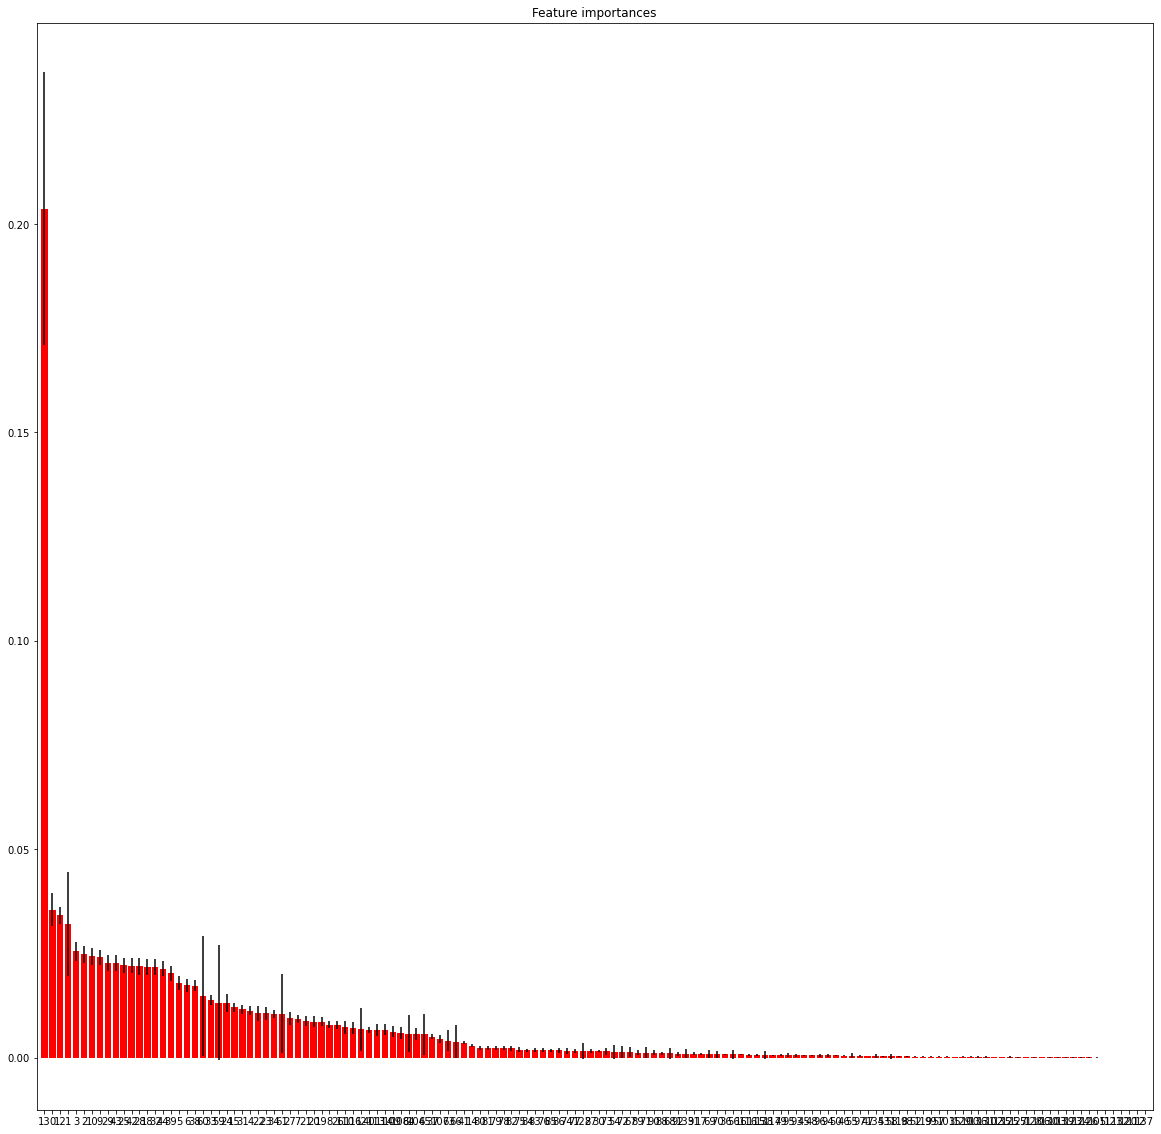

In [53]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [54]:
# Feature selection based on the above feature importance
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest, prefit=True, threshold=0.018)
X_train_new = model.transform(X_train_scaled)
X_train_new.shape

(150000, 17)

In [55]:
X_test_new = model.transform(X_test_scaled)
X_test_new.shape

(50000, 17)

In [56]:
model.get_support(True)

array([ 0,  1,  2,  3,  9, 10, 12, 13, 18, 25, 28, 29, 32, 39, 42, 43, 44],
      dtype=int64)

In [57]:
X_cols = X_test.columns

In [66]:
print("Features selected by scikit learn SelecFromModel are:\n")
for i in model.get_support(True):
    print(X_cols[i])

Features selected by scikit learn SelecFromModel are:

loan_amnt
int_rate
annual_inc
dti
revol_bal
revol_util
total_rec_int
last_pymnt_amnt
tot_cur_bal
total_rev_hi_lim
avg_cur_bal
bc_util
mths_since_recent_inq
percent_bc_gt_75
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit


In [62]:
# Using K fold cross validation and Grid search to get the most accurate prediction

param_grid = {'n_estimators': [10,20,30,40,50]}
clf = RandomForestClassifier(random_state = 1,n_jobs=-1)
clf_cv = GridSearchCV(clf, param_grid, cv=5)
clf_cv.fit(X_train_new, y_train)
y_pred_ranf = clf_cv.predict(X_test_new)
print("Tuned Random Forest Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_))
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred_ranf)))

Tuned Random Forest Parameters: {'n_estimators': 50}
Best score is 0.93232
Accuracy score is 0.93698


In [63]:
pl_ranf = confusion_matrix(y_test,y_pred_ranf)
pl_ranf

array([[38894,  1034],
       [ 2117,  7955]], dtype=int64)

In [64]:
cl_rep_ranf = classification_report(y_test,y_pred_ranf)
print(cl_rep_ranf)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     39928
           1       0.88      0.79      0.83     10072

    accuracy                           0.94     50000
   macro avg       0.92      0.88      0.90     50000
weighted avg       0.94      0.94      0.94     50000



In [65]:
ac = accuracy_score(y_test, y_pred_ranf)
print('Test Data Set Random Forest: Accuracy=%.3f' % (ac))

f1 = f1_score(y_test, y_pred_ranf, average='weighted')
print('Test Data Set Random Forest: f1-score=%.3f' % (f1))

roc_auc = roc_auc_score(y_test, y_pred_ranf)
print('Test Data Set Random Forest: roc_auc_score=%.3f' % (roc_auc))

Test Data Set Random Forest: Accuracy=0.937
Test Data Set Random Forest: f1-score=0.936
Test Data Set Random Forest: roc_auc_score=0.882
